In [39]:
import torch
import torch.nn as nn

def mlp(sizes, activation, output_activation=nn.Identity()):
    """
    @info: create a multilayer perpectron architecture
    """
    layers=[]
    for i in range(len(sizes)-1):
        act = activation if (i+2)< len(sizes) else output_activation
        layers += [nn.Linear(sizes[i], sizes[i+1]), act]
    
    #return layers
    return nn.Sequential(*layers)




In [42]:
#a = [var for var in range(4)]
#print(*a)

model_1 = mlp(sizes=[4,*list((64,30)),2], activation=nn.Tanh())
model_2 = mlp(sizes=[2,*list((64,30)),8], activation=nn.ReLU())

In [50]:
a = [1,2,3,4,5,6]

b = a[0:3]
c = a[3:]
c

[4, 5, 6]

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as f

class BasicNeuralNet(nn.Module):
    def __init__(self, n_inputs=1, n_outputs=1):
        super().__init__()
        self.n_neurons = 2;
        self.l1 = nn.Linear(in_features=n_inputs, out_features=self.n_neurons)

    def forward(self, obs):
        x = f.relu(self.l1(obs))
        return x
    


In [13]:
computer = BasicNeuralNet(n_inputs=1, n_outputs=1)
player = BasicNeuralNet(n_inputs=1, n_outputs=1)

In [14]:
for name, param in computer.named_parameters():
    print(f"name:{name}: , {param.data}")

name:l1.weight: , tensor([[0.9669],
        [0.0799]])
name:l1.bias: , tensor([-0.9473, -0.0190])


In [15]:
for name, param in player.named_parameters():
    print(f"name:{name}: , {param.data}")

name:l1.weight: , tensor([[-0.3387],
        [ 0.9855]])
name:l1.bias: , tensor([-0.2889,  0.7325])


In [16]:
# copy parameters
for computer_param, player_param in zip(computer.parameters(), player.parameters()):
    computer_param.data.copy_(player_param.data)


In [17]:
for name, param in computer.named_parameters():
    print(f"name:{name}: , {param.data}")

name:l1.weight: , tensor([[-0.3387],
        [ 0.9855]])
name:l1.bias: , tensor([-0.2889,  0.7325])


In [2]:
import numpy as np
_MAX_SHOULDER_POS = np.deg2rad(180)
_MIN_SHOULDER_POS = np.deg2rad(-90)

_MAX_ELBOW_POS = np.deg2rad(130)
_MIN_ELBOW_POS = np.deg2rad(0)

_MAX_WRIST_POS = {'x':2, 'y':2.5}
_MIN_WRIST_POS = {'x':0, 'y':0.5}

_MAX_FIBER_ACTIVATION = 1
_MIN_FIBER_ACTIVATION = 0


# observation directory
max_obs = {}
# joint 
max_obs['shoulder_pos']=_MAX_SHOULDER_POS
max_obs['elbow_pos']=_MAX_ELBOW_POS
# muscle
max_obs['fiber_activation']=_MAX_FIBER_ACTIVATION
# marker
max_obs['wrist_marker_x']=_MAX_WRIST_POS['x']
max_obs['wrist_marker_y']=_MAX_WRIST_POS['y']   

In [3]:
high = [var for var in max_obs.values()]

In [10]:
import numpy as np
_MAX_LIST = {"r_shoulder":{'pos':np.deg2rad(180), 'vel': 1}, \
             "r_elbow":{'pos':np.deg2rad(130), 'vel': 1}, \
             "wrist":{'x':1, 'y':2}, \
             "fiber": {"activation":1}}

_MIN_LIST = {"r_shoulder":{'pos':np.deg2rad(-90), 'vel': -1}, \
             "r_elbow":{'pos':np.deg2rad(0), 'vel': -1}, \
             "wrist":{'x':-1, 'y':0.5}, \
             "fiber": {"activation":0}}


In [14]:
init_pos = [1,2]
_JOINT_LIST = ["r_shoulder", "r_elbow"]

{joint_name:init_pos[idx] for idx, joint_name in enumerate(_JOINT_LIST)}

{'r_shoulder': 1, 'r_elbow': 2}

In [52]:
import numpy as np
obs = [4,3,2,3]

if 0<=np.array(obs).any()<=1:
    print(f"wrong")

wrong


In [65]:
import numpy as np
obs = [1,1,1]
not np.logical_and(np.all(np.array(obs)<=1), np.all(np.array(obs)>=0))


False

In [57]:
np.all(np.array(obs)<=1)

False

In [53]:
import numpy as np

max_error=1
metric = 0.99
mean = 0
std = max_error/2
np.exp(-(metric-mean)**2/(2*std**2))

0.14083025205384142

In [2]:
import numpy as np
_MAX_LIST = {"pos_des":{'x':0.5, 'y':0.8}, \
            "r_shoulder":{'pos':np.deg2rad(180), 'vel': 1}, \
            "r_elbow":{'pos':np.deg2rad(150), 'vel': 1}, \
            "r_radius_styloid":{'x':0.5, 'y':0.8} , \
            "TRIlong": {"act":1},\
            "TRIlat": {"act":1},\
            "TRImed": {"act":1},\
            "BIClong": {"act":1},\
            "BICshort": {"act":1},\
            "BRA": {"act":1}}


In [11]:
var = [dict_1 for dict_1 in _MAX_LIST.items()]

for obj_name in _MAX_LIST.keys():
    print(f"{obj_name}")
    for name, var in _MAX_LIST[obj_name].items():
        print(f"\t{name}: {var}")

pos_des
	x: 0.5
	y: 0.8
r_shoulder
	pos: 3.141592653589793
	vel: 1
r_elbow
	pos: 2.6179938779914944
	vel: 1
r_radius_styloid
	x: 0.5
	y: 0.8
TRIlong
	act: 1
TRIlat
	act: 1
TRImed
	act: 1
BIClong
	act: 1
BICshort
	act: 1
BRA
	act: 1


In [15]:
obs = 0.7*np.ones((5,))
if not np.logical_and(np.all(np.array(obs)<=1), np.all(np.array(obs)>=0)):
    print(f"out of range")

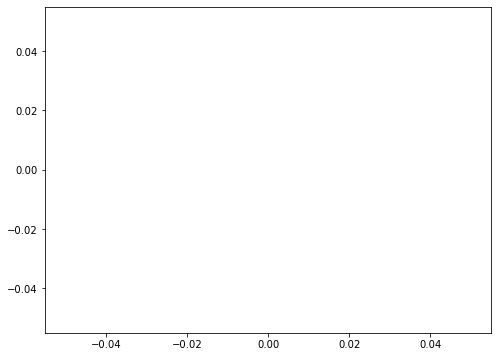

In [29]:
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from matplotlib.figure import Figure
import numpy as np

# to run GUI event loop
plt.ion()

fig, ax = plt.subplots(figsize=(8, 6))
line1, = ax.plot([], [], "r") 


sim_timesteps = 0
max_timesptes = 100
step_size = 1

t = []
a = []
while sim_timesteps<max_timesptes:
    # update time
    sim_timesteps += step_size
    # data
    x = np.sin(2*np.pi/5*sim_timesteps)
    
    t.append(sim_timesteps)
    a.append(x)
    
    line1.set_xdata(sim_timesteps)
    line1.set_ydata(x)
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(0.1)
    #plt.show()
    #plot._update_figure(time_data=sim_timesteps, act_data=x)



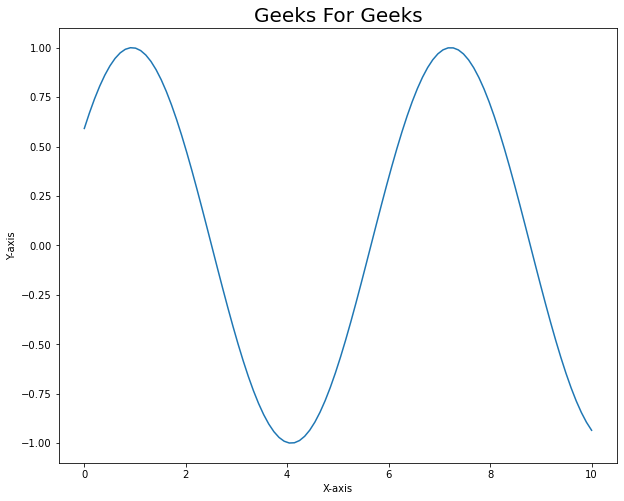

In [31]:
# importing libraries
import numpy as np
import time
import matplotlib.pyplot as plt

# creating initial data values
# of x and y
x = np.linspace(0, 10, 100)
y = np.sin(x)

# to run GUI event loop
plt.ion()

# here we are creating sub plots
figure, ax = plt.subplots(figsize=(10, 8))
line1, = ax.plot(x, y)

# setting title
plt.title("Geeks For Geeks", fontsize=20)

# setting x-axis label and y-axis label
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Loop
for _ in range(50):
	# creating new Y values
	new_y = np.sin(x-0.5*_)

	# updating data values
	line1.set_xdata(x)
	line1.set_ydata(new_y)

	# drawing updated values
	figure.canvas.draw()

	# This will run the GUI event
	# loop until all UI events
	# currently waiting have been processed
	figure.canvas.flush_events()

	time.sleep(0.1)


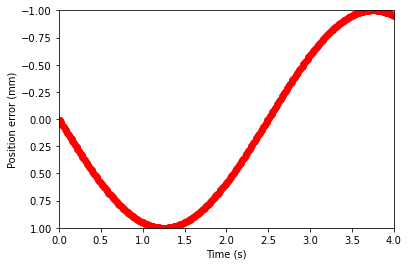

In [17]:
#import matplotlib.pyplot as plt
import matplotlib.animation as anim
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import numpy as np

class Plotter():
    def __init__(self, width=5, height=4, dpi=100, interval=10):

        #self.figure = Figure(figsize=(width, height), dpi=dpi, tight_layout=True)
        
        min_y = +1
        max_y = -1
        min_x = 0
        max_x = 4

        self.fig= plt.subplots(figsize=(8, 6))

        self.ax1 = plt.axes()#plt.plot()#self.fig.add_subplot(2,1,1)
        self.ax1.set_xlabel('Time (s)')
        self.ax1.set_ylabel('Position error (mm)')
        self.ax1.set_xlim((min_x,max_x))
        self.ax1.set_ylim((min_y,max_y))    
        self.line1, = self.ax1.plot([], [], 'ro')  

        # vector of data
        self.time_data = []
        self.act_data = []        

        self.ani = anim.FuncAnimation(self.fig, self._update_figure, interval=interval, blit=True)


      

    def _update_figure(self, time_data,act_data):
        self.time_data.append(time_data)
        self.act_data.append(act_data)
        
        self.line1.set_data(self.time_data, self.act_data)
        return self.line1

# main

plot = Plotter() # default paremeters

sim_timesteps = 0
max_timesptes = 400
step_size = 1e-2
while sim_timesteps<max_timesptes:
    # update time
    sim_timesteps += step_size
    # data
    x = np.sin(2*np.pi/5*sim_timesteps)

    plot._update_figure(time_data=sim_timesteps, act_data=x)




KeyboardInterrupt: 

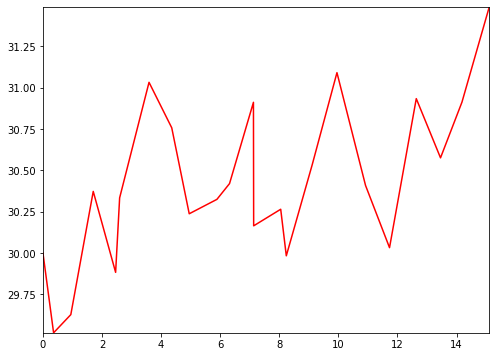

In [18]:
import matplotlib.pyplot as plt
import random
import time

# My arrays are empty at the beginning
raw_temp_bme = [30]
temps = [0]

plt.ion()
fig, ax = plt.subplots(figsize=(8, 6))
line1, = ax.plot(temps, raw_temp_bme, "r") 

#simulating your sensor data
def get_temperature_bme680():
    x =  random.random()
    temps.append(temps[-1] + x)  
    raw_temp_bme.append(raw_temp_bme[-1] + 2 * random.random() - 1)
    if len(temps) > 50:
        temps[:] = temps[1:]
        raw_temp_bme[:] = raw_temp_bme[1:] 
    time.sleep(x)
     

while True:
    get_temperature_bme680() # my fonction to append my arrays
    line1.set_xdata(temps)
    line1.set_ydata(raw_temp_bme)
    ax.set_xlim(min(temps), max(temps))
    ax.set_ylim(min(raw_temp_bme), max(raw_temp_bme))
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(0.0001)

plt.show()

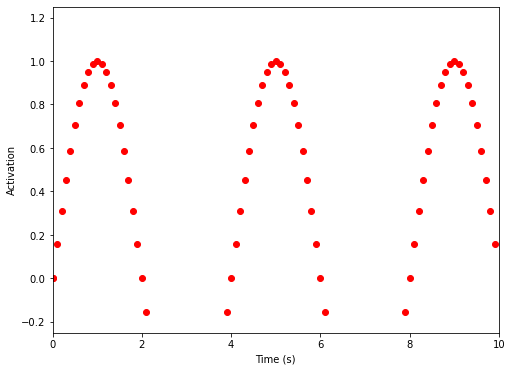

In [33]:
class Plotter():
    def __init__(self, width=5, height=4, dpi=100, interval=10, max_simtime=4):
        min_y = -0.25
        max_y = 1.25
        min_x = 0
        max_x = max_simtime
        plt.ion()        

        self.fig, self.ax1= plt.subplots(figsize=(8, 6))

        self.ax1.set_xlabel('Time (s)')
        self.ax1.set_ylabel('Activation')
        self.ax1.set_xlim((min_x,max_x))
        self.ax1.set_ylim((min_y,max_y))    
        self.line1, = self.ax1.plot([], [], 'ro')     

        self.time_buf = []     
        self.act_buf = []

        
    def update_figure(self):
        self.line1.set_xdata(self.time_buf)
        self.line1.set_ydata(self.act_buf)
        self.fig.canvas.draw()
        self.fig.canvas.flush_events()

    def add_data (self, time, act):
        self.time_buf.append(time)
        self.act_buf.append(act)        

# main
max_simtime = 10
sim_timesteps = 0
step_size = 1e-2
max_timesteps = int(max_simtime/step_size)

my_plot = Plotter(max_simtime=max_simtime)

#plt.ion()
my_plot.add_data(0, 0)

for sim_timesteps in range(0, max_timesteps):
    # data
    act = np.sin(2*np.pi/4*sim_timesteps*step_size)
    
    if sim_timesteps%10==0:
        my_plot.add_data(time=sim_timesteps*step_size, act=act)
        my_plot.update_figure()
        #print(f"time: {sim_timesteps}, act: {act}")
    
        

In [2]:
import numpy as np
_MAX_LIST = {"pos_des":{'x':0.5, 'y':0.8}, \
        "r_shoulder":{'pos':np.deg2rad(180), 'vel': np.deg2rad(180)}, \
        "r_elbow":{'pos':np.deg2rad(150), 'vel': np.deg2rad(180)}, \
        "r_radius_styloid":{'x':0.5, 'y':0.8} , \
        "TRIlong": {"act":1},\
        "TRIlat": {"act":1},\
        "TRImed": {"act":1},\
        "BIClong": {"act":1},\
        "BICshort": {"act":1},\
        "BRA": {"act":1}}

In [5]:
l_names = [key+'_'+name for key, val in _MAX_LIST.items() for name in val]

In [9]:
a = np.array([1,2,3,4,5])

In [13]:
a[0:3] = np.mean(a[0:3])
a[3:6] = np.mean(a[3:6])

In [1]:
import numpy as np 

_JOINT_MAX = {"r_shoulder":{'pos':np.deg2rad(180), 'vel': np.deg2rad(180)}, \
              "r_elbow":{'pos':np.deg2rad(150), 'vel': np.deg2rad(180)}}


In [14]:

names = [key+'_'+name for key, val in _JOINT_MAX.items() for name in val.keys()]

 

In [15]:
names

['r_shoulder_pos', 'r_shoulder_vel', 'r_elbow_pos', 'r_elbow_vel']